In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
def drone_traverse(N_boxes, t_scan=8, t_move=1):
    t_total = t_move
    #up
    for a in range(N_boxes):
        t_total += t_scan + t_move
    #down
    for a in range(N_boxes):
        t_total += t_move
    return(t_total)

In [4]:
def get_time_mp(mean_normal, mean_far, p_far):
    far = np.random.choice([True, False], p=[p_far, 1-p_far])
    if far:
        return(np.random.poisson(mean_far))
    else:
        return(np.random.poisson(mean_normal))

In [5]:
def mp_traverse(
    N, N_pellets=8, t_mp_work=8*3600, t_mp_charge=3.5*3600, 
    t_drone_work=15*60, t_drone_charge=15*60, t_scan=8, t_drone_move=1, t_mp_move=1,
    mean_normal=2, mean_far=20, p_far=0.05
):
    p_N = 0
    t_total = 0
    t_drone_flight = 0
    t_mp_action = 0
    while p_N < N:
        t_drone = drone_traverse(N_pellets, t_scan, t_drone_move)
        t_drone_flight += t_drone
        if t_drone_flight >= t_drone_work:
            t_drone_flight = 0
            t_drone += t_drone_charge
        t_mp_move_r = get_time_mp(mean_normal, mean_far, p_far)+t_mp_move
        t_mp_action += t_drone + t_mp_move_r
        if t_mp_action >= t_mp_work:
            t_mp_action = 0
            t_drone += t_mp_charge
        t_total += t_drone + t_mp_move_r
        p_N += N_pellets
    return(t_total, p_N)

### Single mobile platform, single drone

In [6]:
smsd_times = np.stack(
    [mp_traverse(np.random.choice(np.arange(20000, 21000)))[0] for a in np.arange(1000)]
)

In [7]:
np.mean(smsd_times/3600), np.std(smsd_times/3600)

(161.9260125, 2.8409833769977784)

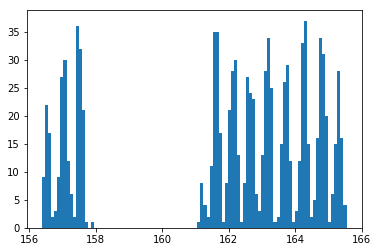

In [8]:
plt.hist(smsd_times/3600, bins=100)
plt.show()

### Single mobile platform, two drones

In [9]:
smtd_times = np.stack(
    [mp_traverse(np.random.choice(np.arange(20000, 21000)), t_drone_charge=0)[0] for a in np.arange(1000)]
)

In [10]:
np.mean(smtd_times/3600), np.std(smtd_times/3600)

(84.9469, 0.8436320779233293)

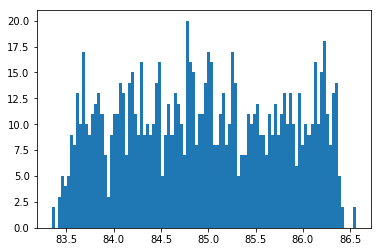

In [11]:
plt.hist(smtd_times/3600, bins=100)
plt.show()

### Single mobile platform, four drones

In [12]:
smfd_times = np.stack(
    [mp_traverse(np.random.choice(np.arange(20000, 21000)), N_pellets=16, t_drone_charge=0)[0] for a in np.arange(1000)]
)

In [13]:
np.mean(smfd_times/3600), np.std(smfd_times/3600)

(83.165735, 0.8047951186004724)

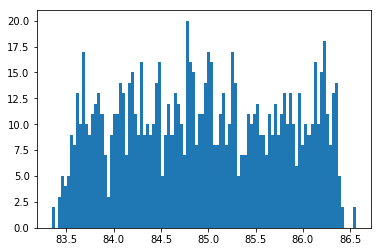

In [14]:
plt.hist(smtd_times/3600, bins=100)
plt.show()

### Two mobile platforms, one drone each

In [15]:
tmsd_times = np.stack(
    [mp_traverse(np.random.choice(np.arange(10000, 10500)))[0] for a in np.arange(1000)]
)

In [16]:
np.mean(tmsd_times/3600), np.std(tmsd_times/3600)

(80.57837722222222, 2.099503109222631)

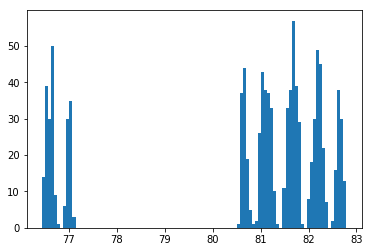

In [17]:
plt.hist(tmsd_times/3600, bins=100)
plt.show()

### Two mobile platforms, two drones each

In [18]:
tmtd_times = np.stack(
    [mp_traverse(np.random.choice(np.arange(10000, 10500)), t_drone_charge=0)[0] for a in np.arange(1000)]
)

In [19]:
np.mean(tmtd_times/3600), np.std(tmtd_times/3600)

(40.7354675, 0.4367241067422307)

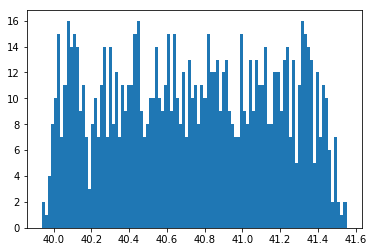

In [20]:
plt.hist(tmtd_times/3600, bins=100)
plt.show()

### Two mobile platforms, four drones each

In [21]:
tmfd_times = np.stack(
    [
        mp_traverse(np.random.choice(np.arange(10000, 10500)), t_drone_charge=0, N_pellets=16)[0] for a in np.arange(1000)
    ]
)

In [22]:
np.mean(tmfd_times/3600), np.std(tmfd_times/3600)

(39.8670325, 0.41376172603865957)

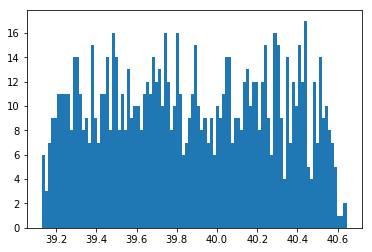

In [23]:
plt.hist(tmfd_times/3600, bins=100)
plt.show()

### Four mobile platforms, one drone each

In [24]:
fmsd_times = np.stack(
    [
        mp_traverse(np.random.choice(np.arange(5000, 5250)))[0] for a in np.arange(1000)
    ]
)

In [25]:
np.mean(fmsd_times/3600), np.std(fmsd_times/3600)

(38.857013611111114, 0.408379395455548)

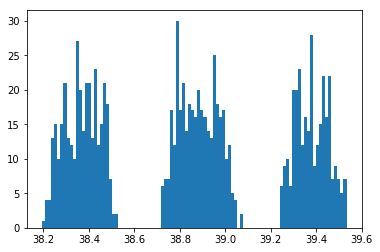

In [26]:
plt.hist(fmsd_times/3600, bins=100)
plt.show()

### Four mobile platforms, two drones each

In [27]:
fmtd_times = np.stack(
    [
        mp_traverse(np.random.choice(np.arange(5000, 5250)), t_drone_charge=0)[0] for a in np.arange(1000)
    ]
)

In [28]:
np.mean(fmtd_times/3600), np.std(fmtd_times/3600)

(18.622656666666668, 0.2108696301474409)

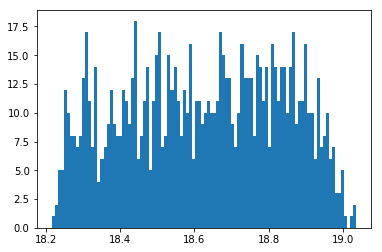

In [29]:
plt.hist(fmtd_times/3600, bins=100)
plt.show()

### Four mobile platforms, four drones each

In [30]:
fmfd_times = np.stack(
    [
        mp_traverse(np.random.choice(np.arange(5000, 5250)), N_pellets=16, t_drone_charge=0)[0] for a in np.arange(1000)
    ]
)

In [31]:
np.mean(fmfd_times/3600), np.std(fmfd_times/3600)

(18.192794166666665, 0.2112016957556125)

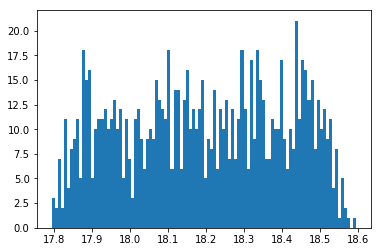

In [32]:
plt.hist(fmfd_times/3600, bins=100)
plt.show()

## Summary

In [42]:
def rnd(x):
    return(np.round(x, 2))

In [57]:
summary = pd.DataFrame(
    {
        "Single MP": [
            (rnd(np.mean(smsd_times/3600)), rnd(np.std(smsd_times/3600))), 
            (rnd(np.mean(smtd_times/3600)), rnd(np.std(smtd_times/3600))), 
            (rnd(np.mean(smfd_times/3600)), rnd(np.std(smfd_times/3600)))
        ], 
        "Two MPs": [
            (rnd(np.mean(tmsd_times/3600)), rnd(np.std(tmsd_times/3600))),
            (rnd(np.mean(tmtd_times/3600)), rnd(np.std(tmtd_times/3600))),
            (rnd(np.mean(tmfd_times/3600)), rnd(np.std(tmfd_times/3600))),
        ], 
        "Four MPs": [
            (rnd(np.mean(fmsd_times/3600)), rnd(np.std(fmsd_times/3600))),
            (rnd(np.mean(fmtd_times/3600)), rnd(np.std(fmtd_times/3600))),
            (rnd(np.mean(fmfd_times/3600)), rnd(np.std(fmfd_times/3600))),
        ], 
    }
)
summary.index = ["Single drone", "Two drones", "Four drones"]

In [58]:
summary

,Single MP,Two MPs,Four MPs
Single drone,"(161.93, 2.84)","(80.58, 2.1)","(38.86, 0.41)"
Two drones,"(84.95, 0.84)","(40.74, 0.44)","(18.62, 0.21)"
Four drones,"(83.17, 0.8)","(39.87, 0.41)","(18.19, 0.21)"
